# Random Walk Code for Statistical Mechanics

This code was written by Kawinnaret Kansutthiwiwat (u6505002). 

The code's main purpose is to demonstrate the nature of random walk with uniform probability in both directions of the walk—a clearer explanation is that in our demonstration, we impose that both directions (namely right and left in the path) have equal probability of $p = 0.5$. In the figure printed out by this code shows the path of each walk and in the figure below it is a histogram displaying the probability distribution of positions in each walk. The total number of steps, $N$, (set as default) is 10000. Therefore, in the first figure, each walk will have 10001 points. We also included the mean of steps to the left ($\langle N_L\rangle$) and right ($\langle N_R\rangle$) in the first figure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Changing fonts
rc = {"font.family" : "serif",
      "mathtext.fontset" : "cm"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

graph_color_list = ['blueviolet', 'chartreuse', 'orangered', 'turquoise', 'steelblue']

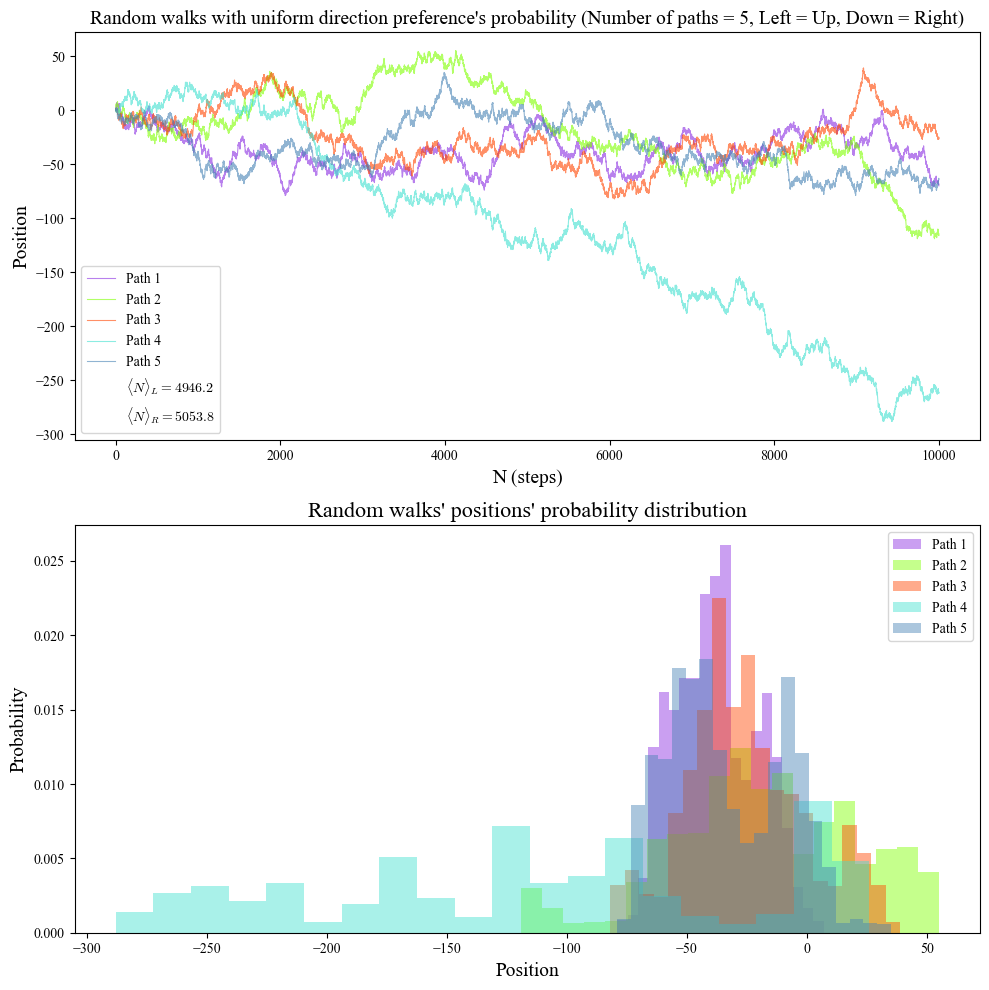

In [35]:
steps = 10000 # Number of steps/total walking steps.
iterate = 5 # Number of iteration. This will be used to plot multiple random walks and calculate the averages of steps to the 'left' and 'right'.
mean_num_step_left = 0
mean_num_step_right = 0

fig, axs = plt.subplots(2, 1, figsize = (10,10))

for j in range(iterate):
    list_direction = np.random.randint(0, 2, size = steps)
    list_direction = list_direction * 2 - 1 # Up and down random walking (1 for up and -1 for down)
    num_step_left = len(list_direction[list_direction == 1])
    num_step_right = len(list_direction[list_direction == -1])

    mean_num_step_left += num_step_left 
    mean_num_step_right += num_step_right 
    
    list_path = [0]
    for i in range(len(list_direction)):
        list_path.append(list_path[i] + list_direction[i])
    
    axs[0].plot(range(steps + 1), list_path, color = graph_color_list[j], linewidth = 0.8, alpha = 0.6, label = f'Path {j + 1}')
    axs[1].hist(list_path, bins = 20, density = True, color = graph_color_list[j], alpha = 0.45, label =f'Path {j + 1}')

mean_num_step_left /= iterate
mean_num_step_right /= iterate
axs[0].plot([], [], color = 'white', label = r'$\langle N_L\rangle = {}$'.format(mean_num_step_left))
axs[0].plot([], [], color = 'white', label = r'$\langle N_R\rangle = {}$'.format(mean_num_step_right))

axs[0].legend()
axs[0].set_title("Random walks with uniform direction preference's probability (Number of paths = {}, Left = Up, Down = Right)".format(iterate), fontsize = 14)
axs[0].set_xlabel("N (steps)", fontsize = 14)
axs[0].set_ylabel("Position", fontsize = 14)


axs[1].legend()
axs[1].set_title("Random walks' positions' probability distribution", fontsize = 16)
axs[1].set_xlabel("Position", fontsize = 14)
axs[1].set_ylabel("Probability", fontsize = 14)

plt.tight_layout()